In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load preprocessed data

In [2]:
emg = np.load('emg_all.npy')
imu = np.load('imu_all.npy')
labels = np.load('labels_all.npy')
subjects = np.load('subjects_all.npy')
sessions = np.load('sessions_all.npy')

# EDA

In [3]:
emg = emg[(labels<6) & (labels>2)]
imu = imu[(labels<6) & (labels>2)]
subjects = subjects[(labels<6) & (labels>2)]
labels = labels[(labels<6) & (labels>2)]

In [4]:
left = [1,  2,  3,  6,  7, 12, 16, 17, 18, 20, 21, 23, 24, 27, 30] #1
right = [4,  5,  8,  9, 10, 11, 13, 14, 15, 19, 20, 21, 22, 25, 26, 28, 29, 31] #0

In [5]:
foot = np.zeros(len(subjects),dtype=int)
strong_foot = np.zeros(len(subjects),dtype=int)
i_foot = []
h_foot = []
for i in range(len(subjects)):
    if subjects[i] in right:
        foot[i] = 0
        strong_foot[i] = 4
        i_foot.append('right')
        h_foot.append('left')
    else:
        foot[i] = 4
        strong_foot[i] = 0
        i_foot.append('left')
        h_foot.append('right')

### std on hamstrings X-axis IMU

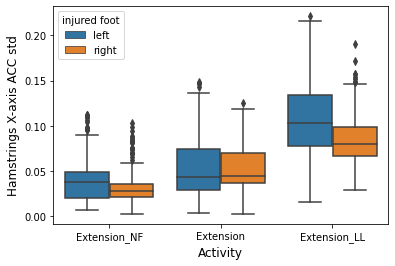

In [6]:
stds_i = np.zeros(len(foot))
stds_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    stds_i[i] = np.std(imu[i,foot[i]*6+6,:])
    
df = pd.DataFrame({'std':stds_i,'injured foot':i_foot, 
                  'activity':labels})
df['activity'].replace({3: 'Extension', 4: 'Extension_NF', 5: 'Extension_LL',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='injured foot',showfliers=True)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Hamstrings X-axis ACC std', fontsize=12)
plt.show()

g.figure.savefig('extension_X_axis_hamstrings_std.png',dpi=300)

### std on tibialis anterior Y-axis IMU

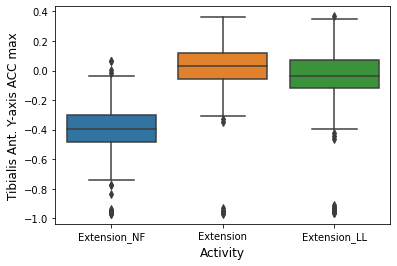

In [7]:
maxs_i = np.zeros(len(foot))

for i in range(len(foot)):
    maxs_i[i] = np.max(imu[i,foot[i]*6+13,:])
    
df = pd.DataFrame({'max':maxs_i, 
                  'activity':labels})
df['activity'].replace({3: 'Extension', 4: 'Extension_NF', 5: 'Extension_LL',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='max',showfliers=True)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Tibialis Ant. Y-axis ACC max', fontsize=12)
plt.show()

g.figure.savefig('extension_Y_axis_tibialis_max.png',dpi=300)

### EMG activations

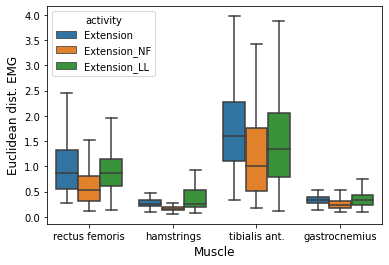

In [8]:
dists = []
activities = []

for i in range(24):

    if i in [0,1,2,3]:
        ex = np.sqrt(np.sum(np.square(emg[np.where(labels==3)[0],i]-emg[np.where(labels==3)[0],i+4]),1))
        ex_nf = np.sqrt(np.sum(np.square(emg[np.where(labels==4)[0],i]-emg[np.where(labels==4)[0],i+4]),1))
        ex_ll = np.sqrt(np.sum(np.square(emg[np.where(labels==5)[0],i]-emg[np.where(labels==5)[0],i+4]),1))
    else:
        continue
    
    dist = list(np.concatenate([ex,ex_nf,ex_ll]))
    activity = list(np.concatenate([labels[labels==3],labels[labels==4],labels[labels==5]]))
    
    dists = dists+dist
    activities = activities+activity
    
muscles = ['rectus femoris']*len(labels) + ['hamstrings']*len(labels) + ['tibialis ant.']*len(labels) + ['gastrocnemius']*len(labels) 


df = pd.DataFrame({'dist':dists, 'activity': activities,
                       'muscle':muscles})  
df['activity'].replace({3: 'Extension', 4: 'Extension_NF', 5: 'Extension_LL',},inplace=True)

g=sns.boxplot(x="muscle", y="dist", hue="activity", data=df,showfliers=False)
plt.xlabel('Muscle', fontsize=12)
plt.ylabel('Euclidean dist. EMG', fontsize=12)
plt.show()

g.figure.savefig('extension_eucl_dist_EMG.png',dpi=300)